# Signal Processing

> Signal processing utils

In [ ]:
#| default_exp sig

In [ ]:
#| hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

In [ ]:
#| export
from spanda.readers import read_opus

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from typing import Tuple

In [ ]:
#| export
def interp(
    x:Tuple[np.ndarray,np.ndarray], #(spectrum, wavenumbers)
    between:Tuple=(4000, 600), # wavenumbers range of interest
    res:int=2, # wavenumbers resolution
    kind:str='linear', # interpolation type (ref. scipy)
) -> Tuple: # (spectrum, wavenumbers) as `np.ndarray`
    "Interpolate spectra within the proper range and at resolution of interest" 
    spectrum, wn = x
    mask = np.logical_and(wn >= between[1], wn <= between[0])
    f = interpolate.interp1d(wn[mask], spectrum[mask], kind=kind, fill_value="extrapolate")
    wn_new = np.arange(between[0], between[1], -res, dtype=int)
    return f(wn_new), wn_new

In [ ]:
fname = 'files/32990XS01.0'
spectrum, wn = interp(read_opus(fname))

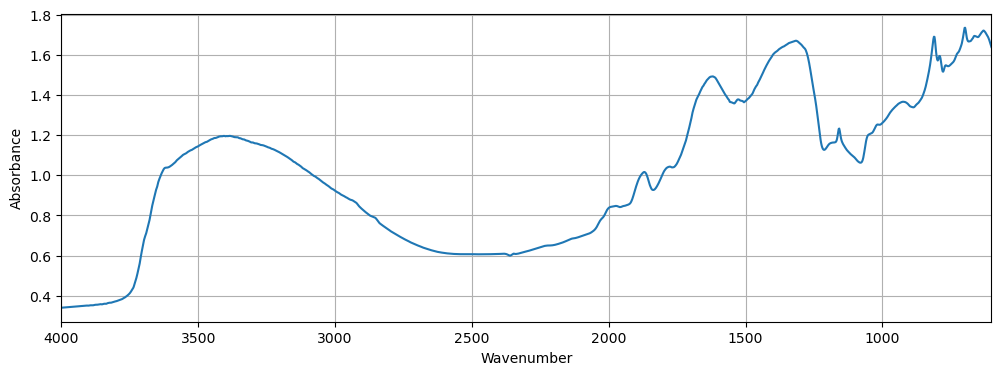

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(np.max(wn), np.min(wn))
ax.set(xlabel='Wavenumber', ylabel='Absorbance')
ax.set_axisbelow(True)
ax.grid(True, which='both')
_ = ax.plot(wn, spectrum)